In [1]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import ast
from spacy.matcher import PhraseMatcher
from spacy import displacy

# Get the parent directory of the current directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to the Python path
sys.path.append(parent_dir)
import myutils
from config import Config

/Users/felix/opt/anaconda3/envs/thesis3.9/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (None)/charset_normalizer (3.0.1) doesn't match a supported version!
  warnings.warn(


In [2]:
config = Config()
rubrics = myutils.load_rubrics('../' + config.PATH_RUBRIC)

# are long rubrics an issue?
lens = {}
for k,v in rubrics.items():
    lens[k] = len(v['key_element'].tolist())

sorted_lens = sorted(lens.items(), key=lambda x: x[1], reverse=True)
print(sorted_lens)

[('8.1_MM', 18), ('5.12', 16), ('2.4', 16), ('11.1_SDN', 12), ('10.1_TC', 11), ('11.2_SDN', 11), ('6.1_IPP', 10), ('11.3_SDN', 10), ('10.2_TC', 7), ('10.3_TC', 7), ('5.7', 7), ('2.1_DLL_v1.1', 6), ('12.1_PE', 6), ('6.2_IPP', 6), ('6.3_IPP', 6), ('12.2_PE', 5), ('6.3', 5), ('1.6', 5), ('11.4_SDN', 4), ('4.1_LM_v1.0', 3), ('8.2_MM', 3), ('1.2', 3), ('4.2_LM_v1.0', 3), ('4.3_LM', 2), ('8.3_MM', 2), ('4.13', 2), ('4.3', 2), ('2.3_DLL_v1.1', 2), ('2.2_DLL', 2), ('12.3_PE', 2), ('5.11', 1)]


In [3]:
# how much similar spans do we predict?

duplicates = []
differences = []
lengths = []
# Open the CSV file and read its contents
with open('../results/grading_final_decision_tree_span_prediction_regression/final_prediction.csv', 'r') as csv_file:
    reader = csv.DictReader(csv_file)

    # Iterate over each row in the CSV file
    for row in reader:
        # Extract the justification_cues column as a string
        justification_cues_str = row['justification_cues']
        
        # Convert the string representation of the list of tuples to an actual list
        justification_cues = eval(justification_cues_str)
        
        duplicates.append(len(justification_cues) != len(set(justification_cues)))
        differences.append(len(justification_cues) - len(set(justification_cues)))
        lengths.append(len(justification_cues))
print(len([d for d in duplicates if d==True]))
print(np.average(differences))
        

258
2.7626666666666666


In [4]:
converters = {
    'justification_cues': ast.literal_eval,
    'scoring_vectors': ast.literal_eval,
    'justification_cue_spans': ast.literal_eval,
}

In [5]:
# calculate metrics without unseen questions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

german_ids = [str(i) for i in range(0,9)]

unseen_question_ids = ['2', '5', '1.2', '11.1_SDN', '11.2_SDN', '11.3_SDN', '11.4_SDN']

In [6]:
file_paths = ['../results/grading_final_decision_tree_span_prediction_regression/final_prediction.csv',
              '../results/grading_final_decision_tree_token_classification_regression/final_prediction.csv',
              '../results/grading_final_summation_span_prediction_regression/final_prediction.csv',
              '../results/grading_final_summation_token_classification_regression/final_prediction.csv',
             ] 

In [7]:
for file_path in file_paths:
    y_true_de, y_pred_de = [], []
    y_true_en, y_pred_en = [], []
    predictions = pd.read_csv(file_path, converters=converters)
    for i, p in predictions.iterrows():
        if p['question_id'] not in unseen_question_ids:
            if p['question_id'] in german_ids:
                y_true_de.append(float(p['score']))
                y_pred_de.append(float(p['y_pred']))
            else:
                y_true_en.append(float(p['score']))
                y_pred_en.append(float(p['y_pred']))
    print(file_path.split('/')[2])
    #print('DE', mean_squared_error(y_true_de, y_pred_de, squared=True))
    print('EN', mean_squared_error(y_true_en, y_pred_en, squared=True))
    y_true_de = [str(i) for i in y_true_de]
    y_pred_de = [str(i) for i in y_pred_de]
    y_true_en = [str(i) for i in y_true_en]
    y_pred_en = [str(i) for i in y_pred_en]
    #print('DE QWK', cohen_kappa_score(y_true_de, y_pred_de, weights='quadratic'))
    print('EN QWK', cohen_kappa_score(y_true_en, y_pred_en, weights='quadratic'))

grading_final_decision_tree_span_prediction_regression
EN 0.08375
EN QWK 0.40004298199531974
grading_final_decision_tree_token_classification_regression
EN 0.083375
EN QWK 0.3313391803071092
grading_final_summation_span_prediction_regression
EN 0.561875
EN QWK 0.03625008290803744
grading_final_summation_token_classification_regression
EN 0.5552083333333333
EN QWK 0.09055306371141758


In [8]:
file_paths = ['../results/grading_final_decision_tree_span_prediction_classification/final_prediction.csv',
              '../results/grading_final_decision_tree_token_classification_classification/final_prediction.csv',
              '../results/grading_final_summation_span_prediction_classification/final_prediction.csv',
              '../results/grading_final_summation_token_classification_classification/final_prediction.csv',
             ] 

In [9]:
for file_path in file_paths:
    y_true_de, y_pred_de = [], []
    y_true_en, y_pred_en = [], []
    predictions = pd.read_csv(file_path, converters=converters)
    for i, p in predictions.iterrows():
        if p['question_id'] not in unseen_question_ids:
            if p['question_id'] in german_ids:
                y_true_de.append(p['class'])
                y_pred_de.append(p['y_pred'])
            else:
                y_true_en.append(p['class'])
                y_pred_en.append(p['y_pred'])
    print(file_path.split('/')[2])
    #print('DE', classification_report(y_true_de, y_pred_de, digits=3))
    print('EN', classification_report(y_true_en, y_pred_en, digits=3))
    #print('DE QWK', cohen_kappa_score(y_true_de, y_pred_de, weights='quadratic'))
    print('EN QWK', cohen_kappa_score(y_true_en, y_pred_en, weights='quadratic'))
    print(20*'-')

grading_final_decision_tree_span_prediction_classification
EN                  precision    recall  f1-score   support

        CORRECT      0.763     0.767     0.765       240
      INCORRECT      0.467     0.333     0.389        21
PARTIAL_CORRECT      0.555     0.579     0.567       114

       accuracy                          0.685       375
      macro avg      0.595     0.560     0.573       375
   weighted avg      0.683     0.685     0.684       375

EN QWK 0.3576111997164628
--------------------
grading_final_decision_tree_token_classification_classification
EN                  precision    recall  f1-score   support

        CORRECT      0.792     0.779     0.786       240
      INCORRECT      0.200     0.095     0.129        21
PARTIAL_CORRECT      0.597     0.675     0.634       114

       accuracy                          0.709       375
      macro avg      0.530     0.517     0.516       375
   weighted avg      0.700     0.709     0.703       375

EN QWK 0.45139515620

In [10]:
file_path = '../results/grading_final_decision_tree_token_classification_regression/final_prediction.csv'
predictions_span = pd.read_csv(file_path, converters=converters)
file_path = '../results/grading_final_decision_tree_token_classification_regression/final_prediction.csv'
predictions_token = pd.read_csv(file_path, converters=converters)

In [11]:
def display_ents(predictions):
    def on_match(matcher, doc, id, matches):
        ents = []
        for m in matches:
            start = m[0]
            end = m[1]
            ents.append({
                'label': 'CUE',
                'span_start': start,
                'span_end': end
            })
        return matches

    def merge_spans(spans):
        sorted_spans = sorted(spans, key=lambda x: x[1])
        merged_spans = []
        for span in sorted_spans:
            if not merged_spans:
                merged_spans.append(span)
            else:
                last_span = merged_spans[-1]
                if last_span[2] >= span[1]:
                    merged_span = (last_span[0], last_span[1], max(last_span[2], span[2]))
                    merged_spans[-1] = merged_span
                else:
                    merged_spans.append(span)
        return merged_spans

    for i, d in predictions.iterrows():
        text = config.nlp(d['text'])
        matcher = PhraseMatcher(config.nlp.vocab)
        spans = []
        for jus_cue in d['justification_cue_spans']:
            for j in jus_cue:
                if len(j):
                    span = config.nlp(j)
                    spans.append(span)
        matcher.add('CUE',spans, on_match=on_match)
        matches = matcher(text)
        matches = merge_spans(matches)
        text.ents = matches
        print(d['question_id'])
        displacy.render(text, style="ent", options={'colors': {'CUE': '#F5F503'}})
        print('True score:', d['score'], 'Predicted score:', d['y_pred'])

In [12]:
display_ents(predictions_token)

8.2_MM


True score: 0.75 Predicted score: 0.875
8.2_MM


True score: 0.875 Predicted score: 0.875
8.2_MM


True score: 0.75 Predicted score: 0.75
8.2_MM


True score: 1.0 Predicted score: 0.875
8.2_MM


True score: 1.0 Predicted score: 0.75
8.2_MM


/Users/felix/opt/anaconda3/envs/thesis3.9/lib/python3.9/site-packages/spacy/displacy/__init__.py:211: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


True score: 0.75 Predicted score: 0.25
8.2_MM


True score: 1.0 Predicted score: 0.875
8.2_MM


True score: 1.0 Predicted score: 0.875
8.2_MM


True score: 0.625 Predicted score: 0.875
8.2_MM


True score: 0.75 Predicted score: 0.75
8.2_MM


True score: 0.375 Predicted score: 0.875
8.2_MM


True score: 0.0 Predicted score: 0.25
8.2_MM


True score: 0.375 Predicted score: 0.75
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 0.75 Predicted score: 1.0
6.2_IPP


True score: 0.5 Predicted score: 0.5
6.2_IPP


True score: 1.0 Predicted score: 0.75
6.2_IPP


True score: 0.5 Predicted score: 1.0
6.2_IPP


True score: 0.5 Predicted score: 1.0
6.2_IPP


True score: 0.75 Predicted score: 0.75
6.2_IPP


True score: 0.75 Predicted score: 0.75
6.2_IPP


True score: 0.75 Predicted score: 0.5
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 0.5 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 0.75
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 0.75
6.2_IPP


True score: 0.75 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.75
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 0.5 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 0.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.75
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.625
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 0.0 Predicted score: 0.75
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 0.0 Predicted score: 0.875
4.2_LM_v1.0


True score: 1.0 Predicted score: 0.875
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 0.875
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
5.7


True score: 0.375 Predicted score: 0.625
5.7


True score: 1.0 Predicted score: 1.0
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 0.625 Predicted score: 0.625
5.7


True score: 1.0 Predicted score: 0.75
5.7


True score: 1.0 Predicted score: 0.375
5.7


True score: 1.0 Predicted score: 0.375
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 0.375 Predicted score: 0.375
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 0.625 Predicted score: 0.625
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 1.0 Predicted score: 0.375
5.7


True score: 0.375 Predicted score: 0.375
6.3_IPP


True score: 0.5 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 0.5
6.3_IPP


True score: 1.0 Predicted score: 1.0
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.25 Predicted score: 1.0
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.5 Predicted score: 0.5
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 1.0
6.3_IPP


True score: 0.25 Predicted score: 0.625
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.5 Predicted score: 0.25
6.3_IPP


True score: 0.5 Predicted score: 1.0
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.5 Predicted score: 1.0
4.3


True score: 0.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 0.5 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 0.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 0.5 Predicted score: 0.625
4.3


True score: 0.5 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 0.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 0.5 Predicted score: 0.625
12.1_PE


True score: 0.75 Predicted score: 1.0
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 1.0
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.25
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 0.75 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 1.0
12.1_PE


True score: 0.5 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.25
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.25
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 0.75 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 0.75
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 0.875 Predicted score: 1.0
2.4


True score: 0.75 Predicted score: 0.625
2.4


True score: 0.875 Predicted score: 1.0
2.4


True score: 0.875 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 0.375 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 0.0 Predicted score: 0.875
10.1_TC


True score: 0.0 Predicted score: 0.875
10.1_TC


True score: 1.0 Predicted score: 0.75
10.1_TC


True score: 0.875 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 0.75
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 0.5
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 1.0
4.13


True score: 0.0 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 1.0
4.13


True score: 0.5 Predicted score: 0.75
4.13


True score: 0.5 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 1.0
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 0.75
4.1_LM_v1.0


True score: 1.0 Predicted score: 0.5
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
6.3


True score: 1.0 Predicted score: 0.75
6.3


True score: 0.625 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 1.0 Predicted score: 0.875
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.25 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.625 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 0.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.0 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.0 Predicted score: 0.875
10.3_TC


True score: 0.5 Predicted score: 0.625
10.3_TC


True score: 0.75 Predicted score: 0.625
10.3_TC


True score: 1.0 Predicted score: 1.0
10.3_TC


True score: 0.0 Predicted score: 0.625
10.3_TC


True score: 0.75 Predicted score: 1.0
10.3_TC


True score: 0.75 Predicted score: 0.5
10.3_TC


True score: 0.75 Predicted score: 0.75
10.3_TC


True score: 0.75 Predicted score: 0.75
2.3_DLL_v1.1


True score: 0.0 Predicted score: 0.625
2.3_DLL_v1.1


True score: 0.0 Predicted score: 0.625
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.875
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.875
2.3_DLL_v1.1


True score: 0.5 Predicted score: 0.625
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.25
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.625
2.3_DLL_v1.1


True score: 0.5 Predicted score: 0.875
2.3_DLL_v1.1


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 1.0 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 0.25 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.5
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 1.0 Predicted score: 0.625
8.3_MM


True score: 1.0 Predicted score: 0.625
8.3_MM


True score: 0.25 Predicted score: 0.625
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 0.75
2.1_DLL_v1.1


True score: 1.0 Predicted score: 0.75
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 0.0 Predicted score: 0.875
8.1_MM


True score: 0.75 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 0.75
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 0.5
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 0.75
8.1_MM


True score: 0.875 Predicted score: 0.875
8.1_MM


True score: 0.25 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 0.875
8.1_MM


True score: 0.875 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 1.0
4.3_LM


True score: 0.5 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 1.0
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 0.5 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 0.625
5.12


True score: 1.0 Predicted score: 0.625
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
10.2_TC


True score: 0.625 Predicted score: 0.875
10.2_TC


True score: 0.5 Predicted score: 0.625
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 1.0 Predicted score: 0.875
10.2_TC


True score: 0.375 Predicted score: 0.25
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 0.25 Predicted score: 0.625
10.2_TC


True score: 1.0 Predicted score: 0.875
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 0.75 Predicted score: 0.625
12.2_PE


True score: 0.0 Predicted score: 0.875
12.2_PE


True score: 1.0 Predicted score: 0.0
12.2_PE


True score: 0.5 Predicted score: 0.875
12.2_PE


True score: 1.0 Predicted score: 1.0
12.2_PE


True score: 0.0 Predicted score: 0.0
12.2_PE


True score: 1.0 Predicted score: 1.0
12.2_PE


True score: 0.0 Predicted score: 0.375
12.2_PE


True score: 1.0 Predicted score: 0.0
12.2_PE


True score: 0.25 Predicted score: 1.0
12.2_PE


True score: 0.0 Predicted score: 0.375


In [13]:
display_ents(predictions_span)

8.2_MM


True score: 0.75 Predicted score: 0.875
8.2_MM


True score: 0.875 Predicted score: 0.875
8.2_MM


True score: 0.75 Predicted score: 0.75
8.2_MM


True score: 1.0 Predicted score: 0.875
8.2_MM


True score: 1.0 Predicted score: 0.75
8.2_MM


True score: 0.75 Predicted score: 0.25
8.2_MM


True score: 1.0 Predicted score: 0.875
8.2_MM


True score: 1.0 Predicted score: 0.875
8.2_MM


True score: 0.625 Predicted score: 0.875
8.2_MM


True score: 0.75 Predicted score: 0.75
8.2_MM


True score: 0.375 Predicted score: 0.875
8.2_MM


True score: 0.0 Predicted score: 0.25
8.2_MM


True score: 0.375 Predicted score: 0.75
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 0.75 Predicted score: 1.0
6.2_IPP


True score: 0.5 Predicted score: 0.5
6.2_IPP


True score: 1.0 Predicted score: 0.75
6.2_IPP


True score: 0.5 Predicted score: 1.0
6.2_IPP


True score: 0.5 Predicted score: 1.0
6.2_IPP


True score: 0.75 Predicted score: 0.75
6.2_IPP


True score: 0.75 Predicted score: 0.75
6.2_IPP


True score: 0.75 Predicted score: 0.5
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 0.5 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 0.75
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 0.75
6.2_IPP


True score: 0.75 Predicted score: 1.0
6.2_IPP


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.75
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 0.5 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 0.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.75
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 1.0 Predicted score: 0.625
1.6


True score: 1.0 Predicted score: 1.0
1.6


True score: 0.0 Predicted score: 0.75
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 0.0 Predicted score: 0.875
4.2_LM_v1.0


True score: 1.0 Predicted score: 0.875
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 0.875
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.2_LM_v1.0


True score: 1.0 Predicted score: 1.0
5.7


True score: 0.375 Predicted score: 0.625
5.7


True score: 1.0 Predicted score: 1.0
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 0.625 Predicted score: 0.625
5.7


True score: 1.0 Predicted score: 0.75
5.7


True score: 1.0 Predicted score: 0.375
5.7


True score: 1.0 Predicted score: 0.375
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 0.375 Predicted score: 0.375
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 0.625 Predicted score: 0.625
5.7


True score: 0.75 Predicted score: 0.375
5.7


True score: 1.0 Predicted score: 0.375
5.7


True score: 0.375 Predicted score: 0.375
6.3_IPP


True score: 0.5 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 0.5
6.3_IPP


True score: 1.0 Predicted score: 1.0
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.25 Predicted score: 1.0
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.5 Predicted score: 0.5
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 1.0 Predicted score: 1.0
6.3_IPP


True score: 0.25 Predicted score: 0.625
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.5 Predicted score: 0.25
6.3_IPP


True score: 0.5 Predicted score: 1.0
6.3_IPP


True score: 1.0 Predicted score: 0.75
6.3_IPP


True score: 0.5 Predicted score: 1.0
4.3


True score: 0.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 0.5 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 0.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 0.5 Predicted score: 0.625
4.3


True score: 0.5 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 0.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 0.625
4.3


True score: 1.0 Predicted score: 1.0
4.3


True score: 0.5 Predicted score: 0.625
12.1_PE


True score: 0.75 Predicted score: 1.0
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 1.0
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.25
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 0.75 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 1.0
12.1_PE


True score: 0.5 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.25
12.1_PE


True score: 1.0 Predicted score: 0.75
12.1_PE


True score: 1.0 Predicted score: 0.25
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 0.75 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 0.75
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 0.875 Predicted score: 1.0
2.4


True score: 0.75 Predicted score: 0.625
2.4


True score: 0.875 Predicted score: 1.0
2.4


True score: 0.875 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 1.0 Predicted score: 1.0
2.4


True score: 0.375 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
6.1_IPP


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 0.0 Predicted score: 0.875
10.1_TC


True score: 0.0 Predicted score: 0.875
10.1_TC


True score: 1.0 Predicted score: 0.75
10.1_TC


True score: 0.875 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 0.75
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 1.0
10.1_TC


True score: 1.0 Predicted score: 0.5
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 1.0 Predicted score: 1.0
4.13


True score: 0.0 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 1.0
4.13


True score: 0.5 Predicted score: 0.75
4.13


True score: 0.5 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 1.0
4.13


True score: 1.0 Predicted score: 0.75
4.13


True score: 0.75 Predicted score: 0.75
4.1_LM_v1.0


True score: 1.0 Predicted score: 0.5
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
4.1_LM_v1.0


True score: 1.0 Predicted score: 1.0
6.3


True score: 1.0 Predicted score: 0.75
6.3


True score: 0.625 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 1.0 Predicted score: 0.875
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.25 Predicted score: 0.75
6.3


True score: 0.75 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.75
6.3


True score: 0.625 Predicted score: 0.75
6.3


True score: 0.875 Predicted score: 0.875
6.3


True score: 0.875 Predicted score: 0.75
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 0.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
2.2_DLL


True score: 1.0 Predicted score: 1.0
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.0 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 0.75 Predicted score: 0.875
12.3_PE


True score: 1.0 Predicted score: 0.875
12.3_PE


True score: 0.0 Predicted score: 0.875
10.3_TC


True score: 0.5 Predicted score: 0.625
10.3_TC


True score: 0.75 Predicted score: 0.625
10.3_TC


True score: 1.0 Predicted score: 1.0
10.3_TC


True score: 0.0 Predicted score: 0.625
10.3_TC


True score: 0.75 Predicted score: 1.0
10.3_TC


True score: 0.75 Predicted score: 0.5
10.3_TC


True score: 0.75 Predicted score: 0.75
10.3_TC


True score: 0.75 Predicted score: 0.75
2.3_DLL_v1.1


True score: 0.0 Predicted score: 0.625
2.3_DLL_v1.1


True score: 0.0 Predicted score: 0.625
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.875
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.875
2.3_DLL_v1.1


True score: 0.5 Predicted score: 0.625
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.25
2.3_DLL_v1.1


True score: 1.0 Predicted score: 0.625
2.3_DLL_v1.1


True score: 0.5 Predicted score: 0.875
2.3_DLL_v1.1


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 1.0 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 0.25 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 0.5 Predicted score: 0.5
8.3_MM


True score: 0.5 Predicted score: 0.625
8.3_MM


True score: 1.0 Predicted score: 0.625
8.3_MM


True score: 1.0 Predicted score: 0.625
8.3_MM


True score: 0.25 Predicted score: 0.625
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 0.75
2.1_DLL_v1.1


True score: 1.0 Predicted score: 0.75
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
2.1_DLL_v1.1


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 0.0 Predicted score: 0.875
8.1_MM


True score: 0.75 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 0.75
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 0.5
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 1.0
8.1_MM


True score: 1.0 Predicted score: 0.75
8.1_MM


True score: 0.875 Predicted score: 0.875
8.1_MM


True score: 0.25 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 0.875
8.1_MM


True score: 0.875 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 0.875
8.1_MM


True score: 1.0 Predicted score: 1.0
4.3_LM


True score: 0.5 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 1.0
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
4.3_LM


True score: 1.0 Predicted score: 0.875
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 0.5 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.11


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 0.625
5.12


True score: 1.0 Predicted score: 0.625
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
5.12


True score: 1.0 Predicted score: 1.0
10.2_TC


True score: 0.625 Predicted score: 0.875
10.2_TC


True score: 0.5 Predicted score: 0.625
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 1.0 Predicted score: 0.875
10.2_TC


True score: 0.375 Predicted score: 0.25
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 0.25 Predicted score: 0.625
10.2_TC


True score: 1.0 Predicted score: 0.875
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 0.75 Predicted score: 0.625
10.2_TC


True score: 0.75 Predicted score: 0.625
12.2_PE


True score: 0.0 Predicted score: 0.875
12.2_PE


True score: 1.0 Predicted score: 0.0
12.2_PE


True score: 0.5 Predicted score: 0.875
12.2_PE


True score: 1.0 Predicted score: 1.0
12.2_PE


True score: 0.0 Predicted score: 0.0
12.2_PE


True score: 1.0 Predicted score: 1.0
12.2_PE


True score: 0.0 Predicted score: 0.375
12.2_PE


True score: 1.0 Predicted score: 0.0
12.2_PE


True score: 0.25 Predicted score: 1.0
12.2_PE


True score: 0.0 Predicted score: 0.375


In [14]:
training_data = myutils.load_json('../data/training_dataset.json')

In [15]:
training_data

[{'question_id': '2.2_DLL',
  'tutor_feedback': 'The response answers the differences correctly.',
  'label': 'CORRECT',
  'score': 1.0,
  'lang': 'en',
  'student_answer': 'Asynchronous transmission  -Each character is bounded by a start bit and a stop bit  -Simple + inexpensive, but low transmission rates, often up to 200 bit/sec   Synchronous transmission  -Several characters pooled to frames  -Frames defined by SYN or flag  -More complex, but higher transmission rates',
  'question': 'What is the difference between asynchronous and synchronous transmission mode in the Data Link Layer.',
  'reference_answer': 'Asynchronous transmission: Every character a self-contained unit surrounded by a start bit and a stop bit, which is an easy and cheap pattern, but causes low transmission rates.  Synchronous transmission: Several characters pooled to a continuous stream of data (frames), Frames defined by SYN or flag, higher complexity, but higher transmission rates. Requires synchronization b

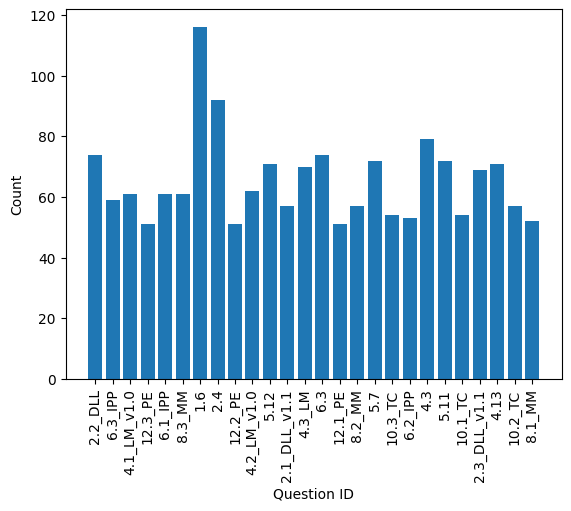

In [16]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each question_id
question_counts = Counter(q['question_id'] for q in training_data)

# Plot the histogram
plt.bar(question_counts.keys(), question_counts.values())
plt.xlabel('Question ID')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

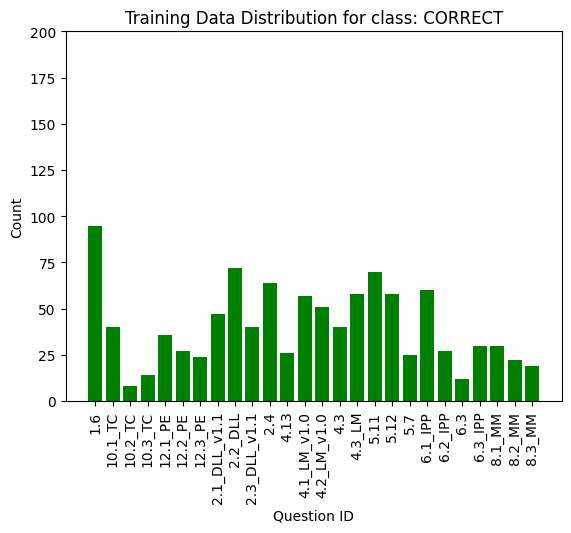

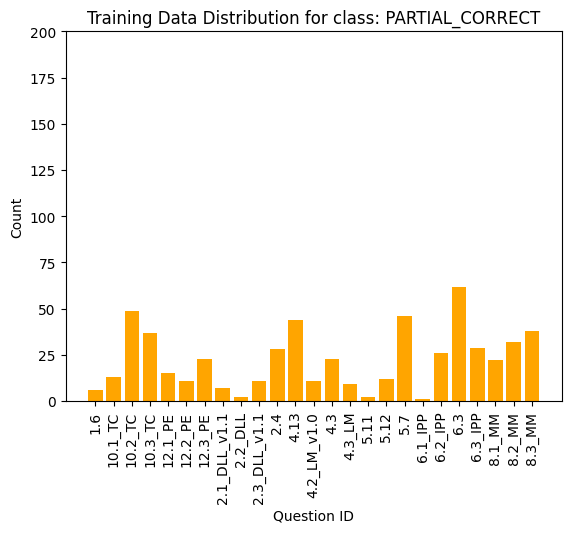

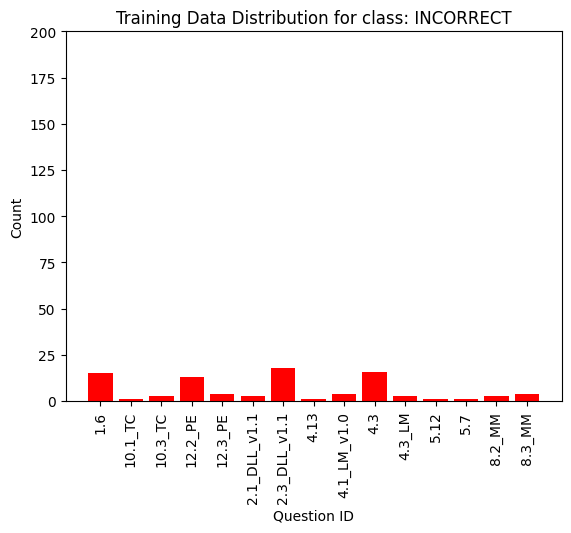

In [17]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each question_id
for l, c in zip(['CORRECT', 'PARTIAL_CORRECT', 'INCORRECT'],  ['green', 'orange', 'red']):
    question_counts = Counter(q['question_id'] for q in training_data if q['label']==l)
    question_counts = sorted(question_counts.items(), key=lambda x: x[0])
    question_counts = {k: v for k, v in question_counts}
    # Plot the histogram
    
    plt.bar(question_counts.keys(), question_counts.values(), color=c)
    plt.title('Training Data Distribution for class: ' + str(l) )
    plt.xlabel('Question ID')
    plt.xticks(rotation=90)
    plt.ylim((0,200))
    plt.ylabel('Count')
    plt.show()

In [18]:
# correlation between classification performance and rubric length

from scipy.stats import pearsonr

x = [4, 3, 4, 11, 7, 7, 12, 11, 10, 4, 6, 5, 2, 2, 6, 2, 2, 16, 3, 2, 3, 2, 2, 2, 2, 6, 1, 16, 7, 2, 10, 6, 5, 6, 4, 2, 18, 3, 2]
y = [0.456, 0.403, 0.303, 0.208, 0.154, 0.222, 0.241, 0.45, 0.25, 0.364, 0.788, 0.775, 0.46, 0.718, 1.0, 0.478, 0.333, 0.622, 0.496, 0.287, 1.0, 0.241, 0.333, 0.237, 0.474, 0.495, 0.489, 0.455, 0.397, 0.43, 1.0, 0.394, 0.442, 0.636, 0.419, 0.307, 0.289, 0.356, 0.222]

corr, pvalue = pearsonr(x, y)
print(f"Pearson correlation coefficient: {corr:.3f}, p-value: {pvalue:.3f}")


Pearson correlation coefficient: 0.011, p-value: 0.949
